# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [11]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Set the API base URL
uom = "metric"
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={uom}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | khunti
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | chonchi
Processing Record 4 of Set 1 | atafu village
Processing Record 5 of Set 1 | nyrsko
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | labytnangi
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | bilibino
Processing Record 10 of Set 1 | fale old settlement
Processing Record 11 of Set 1 | tolanaro
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | saratamata
City not found. Skipping...
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | kelaat mgouna
City not found. Skipping...
Processing Record 17 of Set 1 | akureyri
Processing Record 18 of Set 1 | omdurman
Processing Record 19 of Set 1 | margaret river
Processing Record 20 of Set 1 | geraldton
Processing Record 21 of Set 1 |

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          595
Lat           595
Lng           595
Max Temp      595
Humidity      595
Cloudiness    595
Wind Speed    595
Country       595
Date          595
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,khunti,23.0833,85.2833,23.06,98,100,7.27,IN,1722608144
1,puerto natales,-51.7236,-72.4875,0.25,100,100,2.57,CL,1722608046
2,chonchi,-42.6128,-73.8092,8.56,90,99,3.13,CL,1722608146
3,atafu village,-8.5421,-172.5159,28.12,74,70,6.45,TK,1722608148
4,nyrsko,49.2939,13.1435,19.81,92,100,4.17,CZ,1722608149


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,khunti,23.0833,85.2833,23.06,98,100,7.27,IN,1722608144
1,puerto natales,-51.7236,-72.4875,0.25,100,100,2.57,CL,1722608046
2,chonchi,-42.6128,-73.8092,8.56,90,99,3.13,CL,1722608146
3,atafu village,-8.5421,-172.5159,28.12,74,70,6.45,TK,1722608148
4,nyrsko,49.2939,13.1435,19.81,92,100,4.17,CZ,1722608149


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

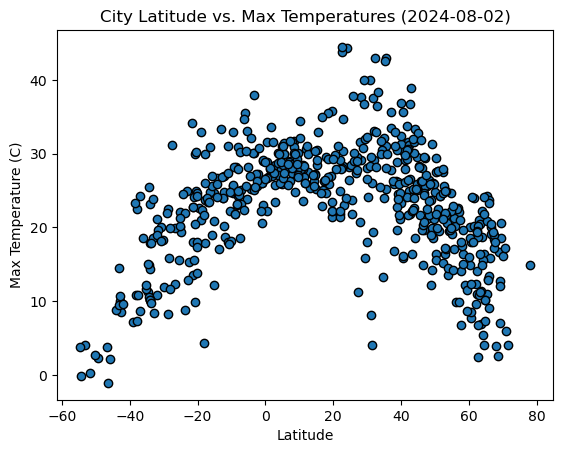

In [24]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker = 'o', edgecolors='black')


# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperatures (2024-08-02)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

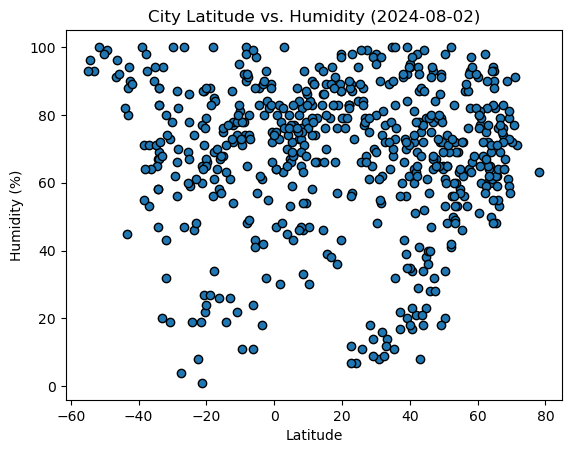

In [26]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker = 'o', edgecolors='black')


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-08-02)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

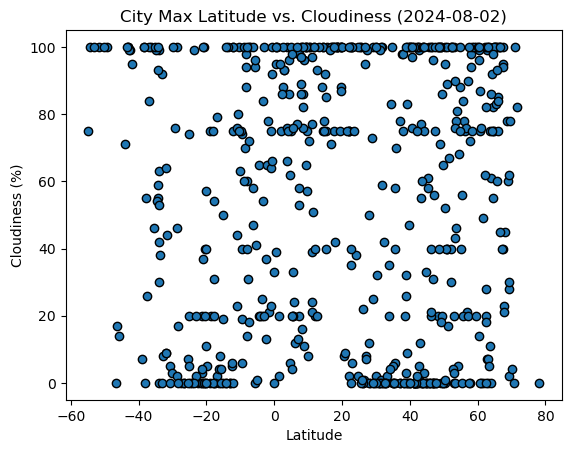

In [27]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker = 'o', edgecolors='black')


# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2024-08-02)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

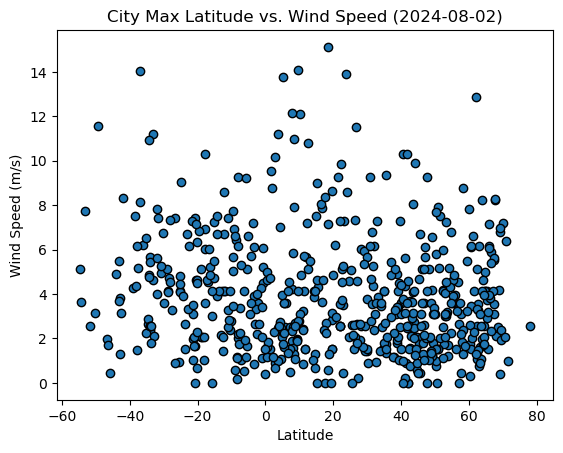

In [29]:
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker = 'o', edgecolors='black')


# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (2024-08-02)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [59]:
# Define a function to create Linear Regression plots
def linregress_plot(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress = x * slope + intercept
    line_eq = (f"y = {round(slope,2)}x + {round(intercept,2)}")
    print(f"The r-value is: {rvalue}")
    plt.scatter(x, y, marker="o", edgecolor="black", linewidths=0.5)
    plt.plot(x,regress,"r")
    plt.annotate(line_eq,(x.min(),y.min()),color="r",fontsize=12)
    plt.tight_layout()

In [60]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,khunti,23.0833,85.2833,23.06,98,100,7.27,IN,1722608144
4,nyrsko,49.2939,13.1435,19.81,92,100,4.17,CZ,1722608149
5,yellowknife,62.4560,-114.3525,14.12,59,20,2.57,CA,1722608045
6,labytnangi,66.6572,66.4183,20.09,79,100,5.90,RU,1722608151
8,bilibino,68.0546,166.4372,3.85,67,45,2.11,RU,1722608153


In [61]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,puerto natales,-51.7236,-72.4875,0.25,100,100,2.57,CL,1722608046
2,chonchi,-42.6128,-73.8092,8.56,90,99,3.13,CL,1722608146
3,atafu village,-8.5421,-172.5159,28.12,74,70,6.45,TK,1722608148
7,grytviken,-54.2811,-36.5092,-0.14,96,100,3.64,GS,1722608152
9,fale old settlement,-9.3852,-171.2468,28.20,73,6,6.93,TK,1722608154


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6037494014461378


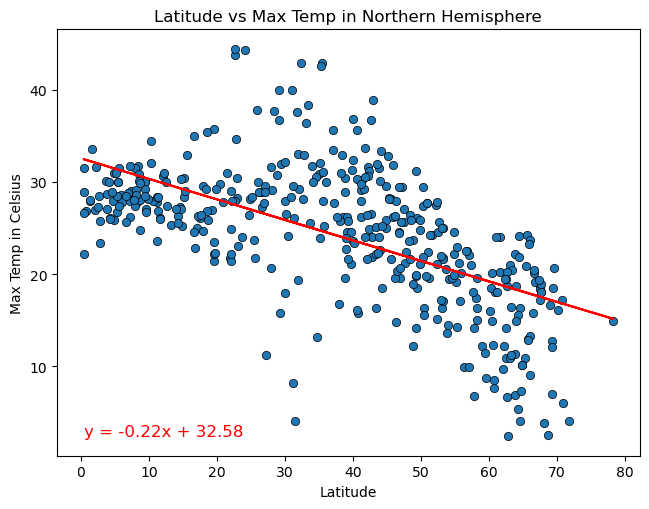

In [62]:
# Linear regression on Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Max Temp in Celsius")
plt.title("Latitude vs Max Temp in Northern Hemisphere")
plt.show()

The r-value is: 0.7653142303282913


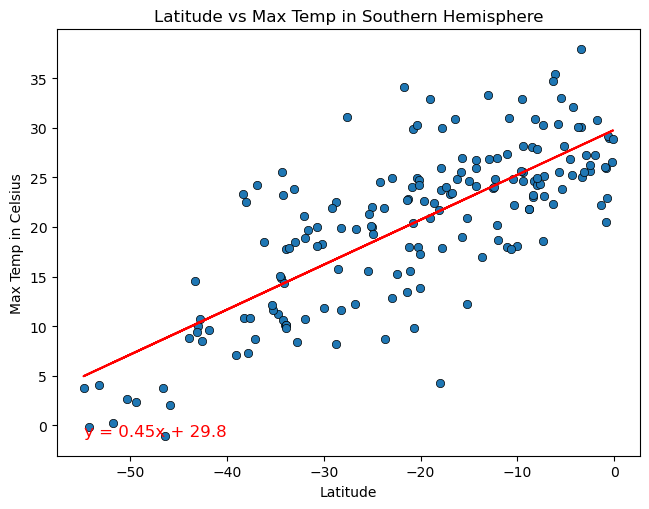

In [63]:
# Linear regression on Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Max Temp in Celsius")
plt.title("Latitude vs Max Temp in Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:**

With a'r-value' of -0.6, we have a strong negative correlation in the northern hemisphere and with a 'r-value' of 0.7, we have a strong positive correlation in the southern hemisphere between the distance from the equator and the Max Temperature.

This indicates that the closest we are to the equator, the higher are the max temperatures.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.030283528307167677


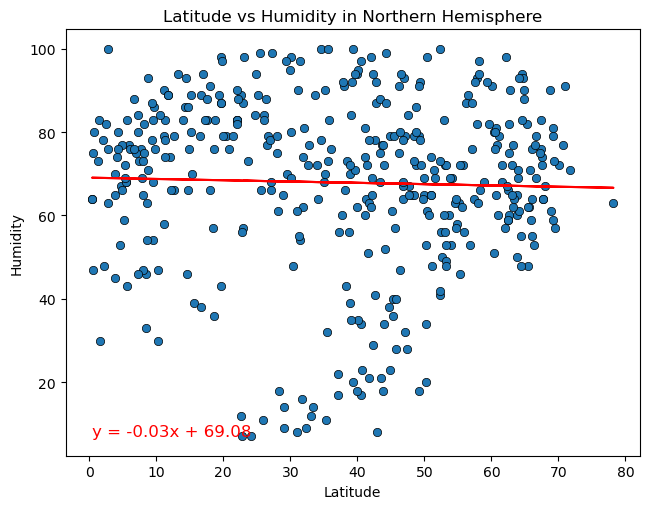

In [64]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity in Northern Hemisphere")
plt.show()

The r-value is: -0.14054759790475557


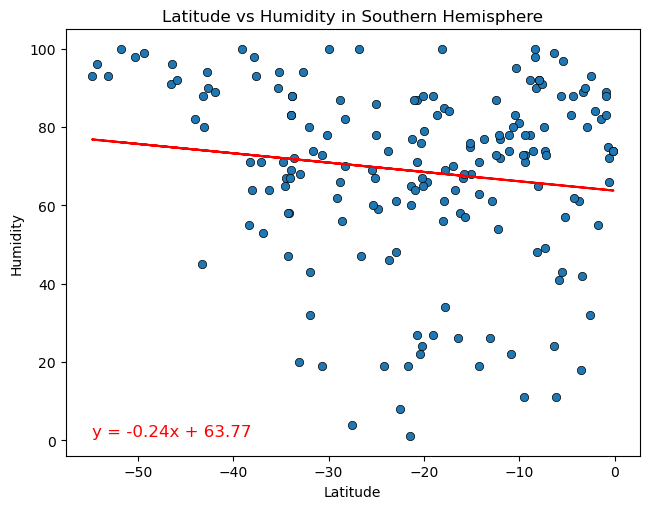

In [65]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity in Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** 

Based on both "r-values" their is little correlation between the humidity and the lattitude. 

When we look at the data, it seems that the cities far from the equator are more humid but it would be interesting to look at the data year over year.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.1059567283649059


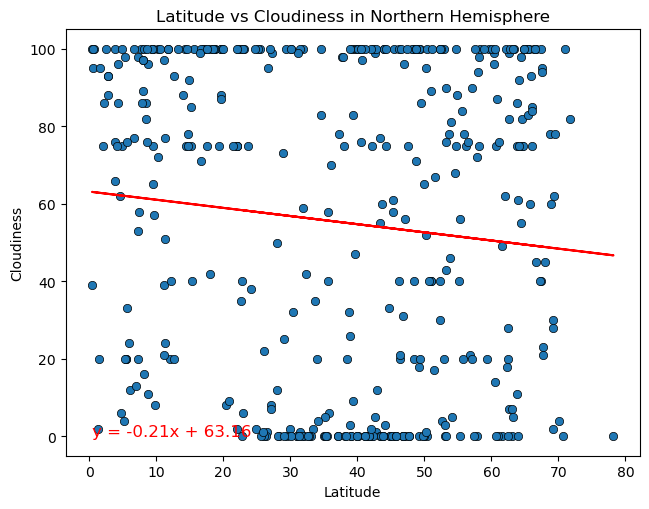

In [66]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness in Northern Hemisphere")
plt.show()

The r-value is: -0.11017361059642135


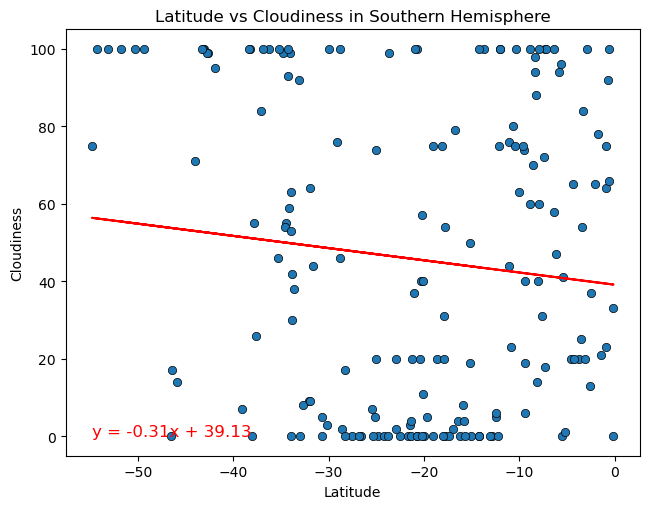

In [67]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness in Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:**

Based on both "r-values" their is little correlation between the cloudiness and the lattitude. 

When we look at the scatter plots, we can see that the cities in the northern hemisphere have more cloud coverage above 60% than the cities in the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.07804062410721922


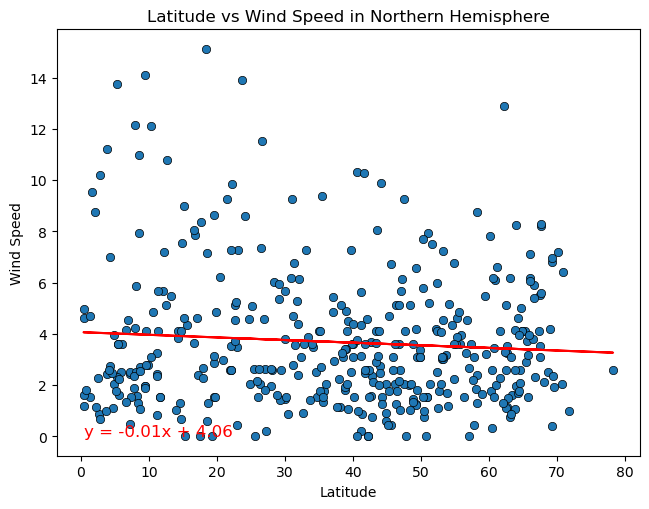

In [69]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed in Northern Hemisphere")
plt.show()

The r-value is: -0.16077529139009286


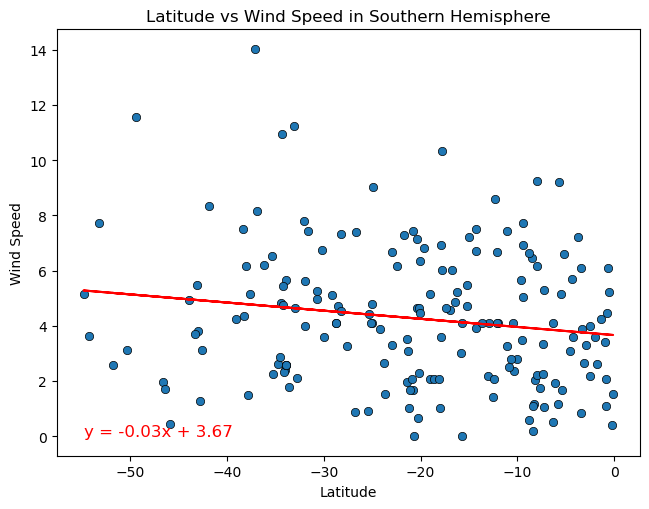

In [70]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed in Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:**

Based on the "r-value" there is little correlation between Wind Speed and City Latitude for both hemispheres. 